In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df_2018 = pd.read_csv("splc-hate-groups-2018.csv")
df_2018.head(30)

,Title,City,State,Group,Ideology,Headquarters,Statewide,Year
0,Abiding Truth Ministries,Springfield,Massachusetts,NaN,Anti-LGBT,Yes,NaN,2018
1,Alliance Defending Freedom,Scottsdale,Arizona,Alliance Defending Freedom,Anti-LGBT,Yes,NaN,2018
2,American College of Pediatricians,Gainesville,Florida,American College of Pediatricians,Anti-LGBT,Yes,NaN,2018
3,American Family Association,Tupelo,Mississippi,American Family Association,Anti-LGBT,Yes,NaN,2018
4,American Family Association,Franklin,Pennsylvania,American Family Association,Anti-LGBT,NaN,NaN,2018
5,American Vision,Powder Springs,Georgia,NaN,Anti-LGBT,Yes,NaN,2018
6,Americans for Truth About Homosexuality,Naperville,Illinois,NaN,Anti-LGBT,Yes,NaN,2018
7,ATLAH World Missionary Church (All The Land An...,New York,New York,NaN,Anti-LGBT,Yes,NaN,2018
8,Bible Believers Fellowship,Worthington,Ohio,NaN,Anti-LGBT,Yes,NaN,2018
9,"Campus Ministry USA, The",Terre Haute,Indiana,NaN,Anti-LGBT,Yes,NaN,2018


In [3]:
df_2014 = pd.read_csv("splc-hate-groups-2014.csv")
df_2014.head(30)

,Title,City,State,Group,Ideology,Headquarters,Statewide,Year
0,11th Hour Remnant Messenger,Santa Fe,New Mexico,NaN,Christian Identity,NaN,NaN,2014
1,a2z Publications,Las Vegas,Nevada,NaN,General Hate,NaN,NaN,2014
2,Abiding Truth Ministries,Springfield,Massachusetts,NaN,Anti-LGBT,NaN,NaN,2014
3,Advanced White Society,Pemberton Township,New Jersey,NaN,White Nationalist,NaN,NaN,2014
4,Aggressive Christianity,Fence Lake,New Mexico,NaN,General Hate,NaN,NaN,2014
5,All Eyes on Egypt Bookstore,Milledgeville,Georgia,NaN,Black Nationalist,NaN,NaN,2014
6,Alliance for Catholic Tradition,Pleasant Unity,Pennsylvania,NaN,Radical Traditional Catholicism,NaN,NaN,2014
7,Alternative Right,Atlanta,Georgia,NaN,White Nationalist,NaN,NaN,2014
8,America's Promise Ministries,Sandpoint,Idaho,America's Promise Ministries,Christian Identity,NaN,NaN,2014
9,American Border Patrol,Sierra Vista,Arizona,American Border Patrol/American Patrol,Anti-Immigrant,NaN,NaN,2014


In [4]:
number_hate_groups = pd.read_csv("groups_per_year.csv")

In [5]:
number_hate_groups

,year,number
0,2000,457
1,2001,602
2,2002,676
3,2003,708
4,2004,751
5,2005,803
6,2006,844
7,2007,888
8,2008,926
9,2009,932


In [6]:
# dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
# plt.title('MinTemp vs MaxTemp')  
# plt.xlabel('MinTemp')  
# plt.ylabel('MaxTemp')  
# plt.show()

In [7]:
X = number_hate_groups[['year']]
y = number_hate_groups.number
reg = LinearRegression().fit(X,y)
reg.coef_, reg.intercept_

(array([21.41754386]), -42179.424561403495)

In [8]:
X

,year
0,2000
1,2001
2,2002
3,2003
4,2004
5,2005
6,2006
7,2007
8,2008
9,2009


In [9]:
y_predicted = reg.predict(X)

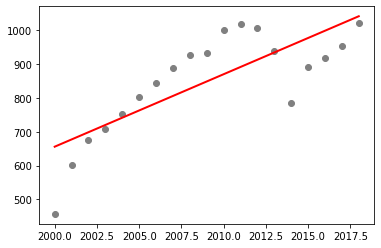

In [10]:
plt.scatter(X, y,  color='gray')
plt.plot(X, y_predicted, color='red', linewidth=2)
plt.show()

In [11]:
test_X = np.array([[2000],[2035]])

y_predicted_2035 = reg.predict(test_X)
y_predicted_2035

array([ 655.66315789, 1405.27719298])

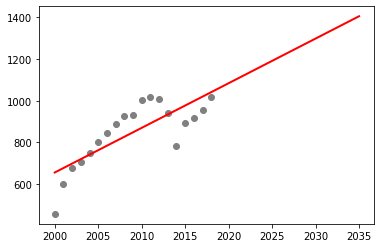

In [12]:
plt.scatter(X, y,  color='gray')
plt.plot(test_X, y_predicted_2035, color='red', linewidth=2)
plt.show()

In [13]:
np.array([[2000],[2005]]).shape

(2, 1)

In [14]:
# save data as csv

In [15]:
# from matplotlib.ticker import StrMethodFormatter
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.scatter(X, y,  color='gray')
# plt.plot(X, y_predicted, color='red', linewidth=2)
# plt.show()

In [16]:
test_X = np.array([[2000],[2030]])

y_predicted_2030 = reg.predict(test_X)
y_predicted_2030

array([ 655.66315789, 1298.18947368])

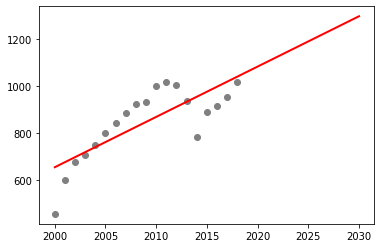

In [25]:
plt.scatter(X, y,  color='gray')
plt.plot(test_X, y_predicted_2030, color='red', linewidth=2)
plt.show()